<a href="https://colab.research.google.com/github/RAWRXD001c/MLB-Baseball/blob/main/Baseball_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HOF possible factors: Hits, Runs



HOF maybe factors: Games, Runs Batted In



HOF probably not factors: Years

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('/content/archive.zip', encoding="latin-1")
import matplotlib.pyplot as plt
import statsmodels.stats.multicomp as mc
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection, metrics
import numpy as np

Saving archive.zip to archive.zip


Research Question: What factors let a player enter the Hall of Fame and can we predict which ones will and won't enter the HOF?

In [2]:
renaming = {'G': 'Games', 'AB': 'At Plate', 'R': 'Runs', 'H': 'Hits', '2B': 'Doubles', '3B': 'Triples',
            'RBI': 'Runs Batted In'}
df = df.rename(columns=renaming)
df['HOF'][160]=1

/tmp/ipython-input-2553983302.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['HOF'][160]=1
/tmp/ipython-input-2553983302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

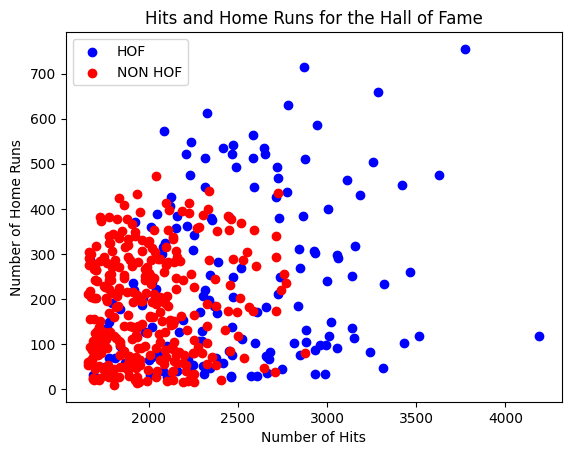

In [ ]:
#Hits and Home Runs
plt.scatter(df[df['HOF'] == 1]['Hits'], df[df['HOF'] ==1]['HR'], color = 'blue', label = 'HOF')
plt.scatter(df[df['HOF'] == 0 ]['Hits'], df[df['HOF'] ==0]['HR'], color = 'red', label = 'NON HOF')
plt.title("Hits and Home Runs for the Hall of Fame")
plt.xlabel("Number of Hits")
plt.ylabel("Number of Home Runs")
plt.legend()

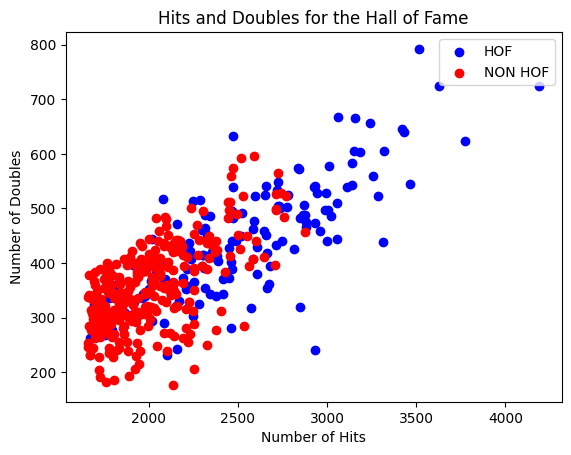

In [ ]:
#Hits and Doubles
plt.scatter(df[df['HOF'] == 1]['Hits'], df[df['HOF'] ==1]['Doubles'], color = 'blue', label = 'HOF')
plt.scatter(df[df['HOF'] == 0 ]['Hits'], df[df['HOF'] ==0]['Doubles'], color = 'red', label = 'NON HOF')
plt.title("Hits and Doubles for the Hall of Fame")
plt.xlabel("Number of Hits")
plt.ylabel("Number of Doubles")
plt.legend()

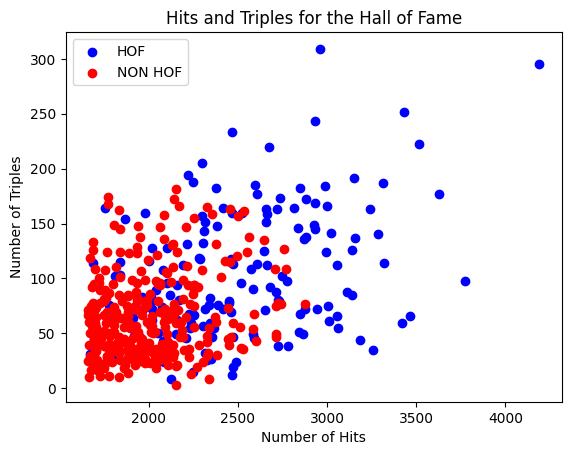

In [3]:
#Hits and Triples
plt.scatter(df[df['HOF'] == 1]['Hits'], df[df['HOF'] ==1]['Triples'], color = 'blue', label = 'HOF')
plt.scatter(df[df['HOF'] == 0 ]['Hits'], df[df['HOF'] ==0]['Triples'], color = 'red', label = 'NON HOF')
plt.title("Hits and Triples for the Hall of Fame")
plt.xlabel("Number of Hits")
plt.ylabel("Number of Triples")
plt.legend()

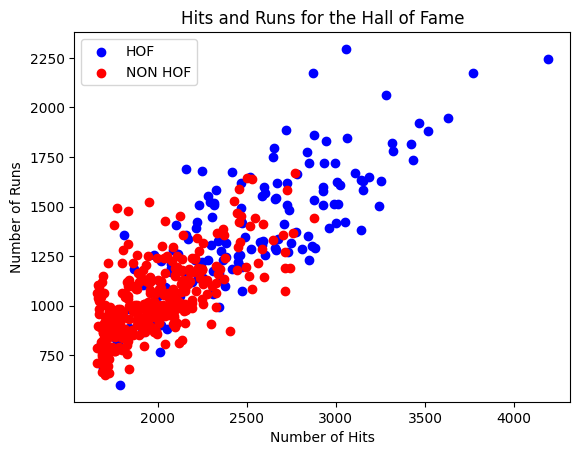

In [ ]:
#Hits and Runs
plt.scatter(df[df['HOF'] == 1]['Hits'], df[df['HOF'] ==1]['Runs'], color = 'blue', label = 'HOF')
plt.scatter(df[df['HOF'] == 0 ]['Hits'], df[df['HOF'] ==0]['Runs'], color = 'red', label = 'NON HOF')
plt.title("Hits and Runs for the Hall of Fame")
plt.xlabel("Number of Hits")
plt.ylabel("Number of Runs")
plt.legend()

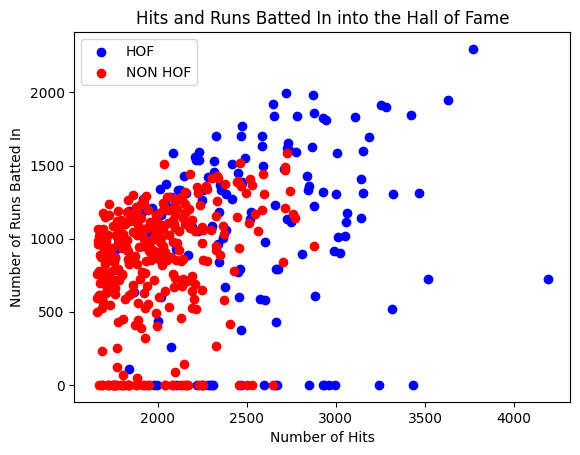

In [ ]:
#Hits and Runs Batted In
plt.scatter(df[df['HOF'] == 1]['Hits'], df[df['HOF'] ==1]['Runs Batted In'], color = 'blue', label = 'HOF')
plt.scatter(df[df['HOF'] == 0 ]['Hits'], df[df['HOF'] ==0]['Runs Batted In'], color = 'red', label = 'NON HOF')
plt.title("Hits and Runs Batted In into the Hall of Fame")
plt.xlabel("Number of Hits")
plt.ylabel("Number of Runs Batted In")
plt.legend()

Accuracy Score:  0.8387096774193549


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

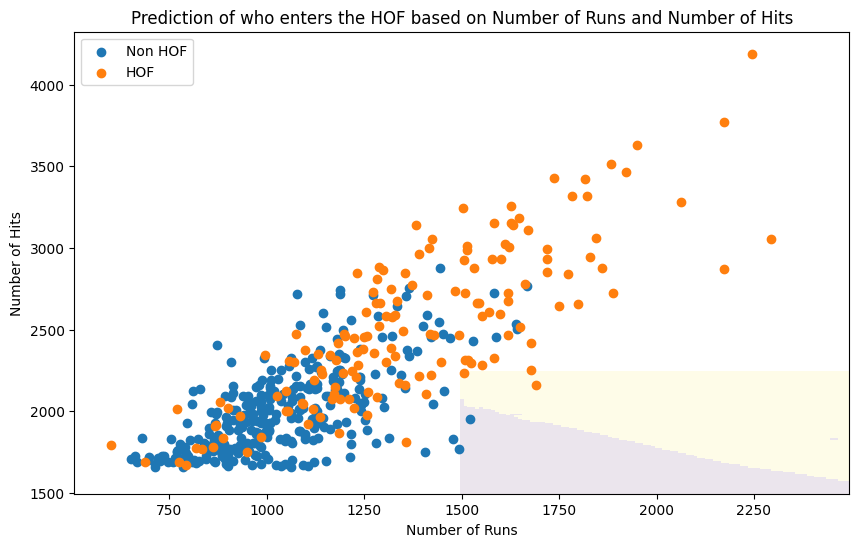

In [ ]:
#KNN (Runs and Hits)
features = df[['Runs', 'Hits']]
label = df['HOF']
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test, predict))

#k=5 0.7956989247311828
#k=3 0.8064516129032258
#k=7 0.8172043010752689
#k=9 0.8279569892473119
#k=10 0.8387096774193549
# 10 has the highest accuracy

#Visual model
fig, ax = plt.subplots(figsize=(10,6))
xx, yy = np.meshgrid(np.arange(1500, 2500, 10), np.arange(1500, 2250, 10))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
ax.pcolormesh(xx, yy, z, alpha=0.1)
for label, data in df.groupby("HOF"):
  ax.scatter(data['Runs'], data['Hits'], label = ['Non HOF', 'HOF'][label])
ax.set_title("Prediction of who enters the HOF based on Number of Runs and Number of Hits")
ax.set_xlabel("Number of Runs")
ax.set_ylabel("Number of Hits")
ax.legend()
plt.show

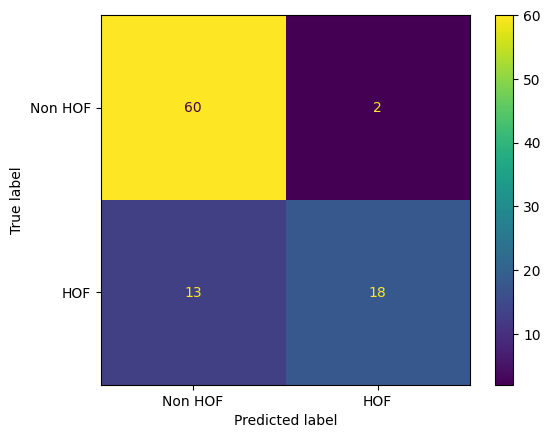

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict, display_labels=["Non HOF", "HOF"])

In [ ]:
#Prediction of HOF based on Runs and Hits
#Range of Runs is 500 to 2250
#Range of Hits is 1500 to 4500
player1 = pd.DataFrame([[1500, 2500]], columns=['Runs', 'Hits'])

prediction1 = model.predict(player1)[0]

print("Player 1 " + str(['is not likely', 'is likely'][prediction1]) + " to be in the HOF")

Player 1 is not likely to be in the HOF


Accuracy Score:  0.8064516129032258


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

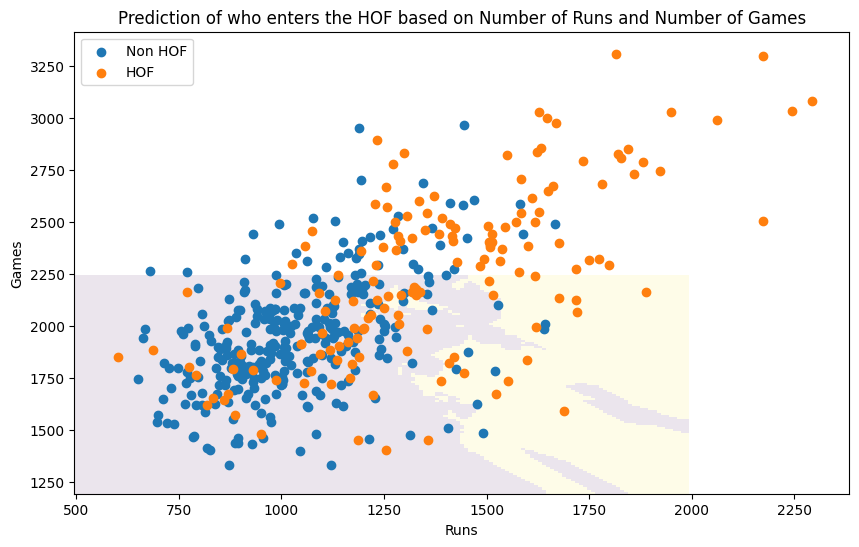

In [63]:
#KNN (Games, Runs)
features = df[['Runs', 'Games']]
label = df['HOF']
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test, predict))
#Visual model
fig, ax = plt.subplots(figsize=(10,6))
xx, yy = np.meshgrid(np.arange(500, 2000, 10), np.arange(1200, 2250, 10))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
ax.pcolormesh(xx, yy, z, alpha=0.1)
for label, data in df.groupby("HOF"):
  ax.scatter(data['Runs'], data['Games'], label = ['Non HOF', 'HOF'][label])
ax.set_title("Prediction of who enters the HOF based on Number of Runs and Number of Games")
ax.set_xlabel("Runs")
ax.set_ylabel("Games")
ax.legend()
plt.show

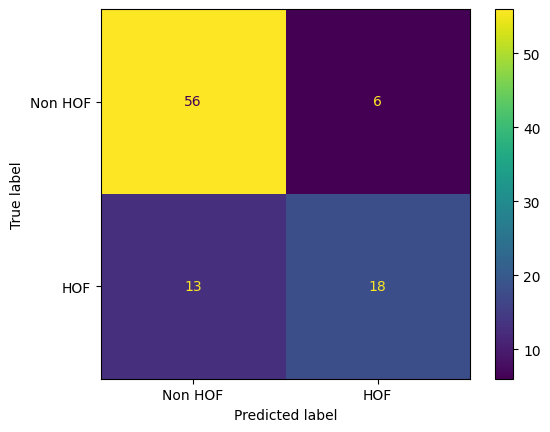

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict, display_labels=["Non HOF", "HOF"])

In [ ]:
#Prediction of HOF based on Games and Runs Batted In
#Range of Games is 1000 to 3500
#Range of Runs Batted In is 0 to 2500
player1 = pd.DataFrame([[2000, 1000]], columns=['Games', 'Runs Batted In'])

prediction1 = model.predict(player1)[0]

print("Player 1 " + str(['is not likely', 'is likely'][prediction1]) + " to be in the HOF")

Player 1 is not likely to be in the HOF


Accuracy Score:  0.8279569892473119


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


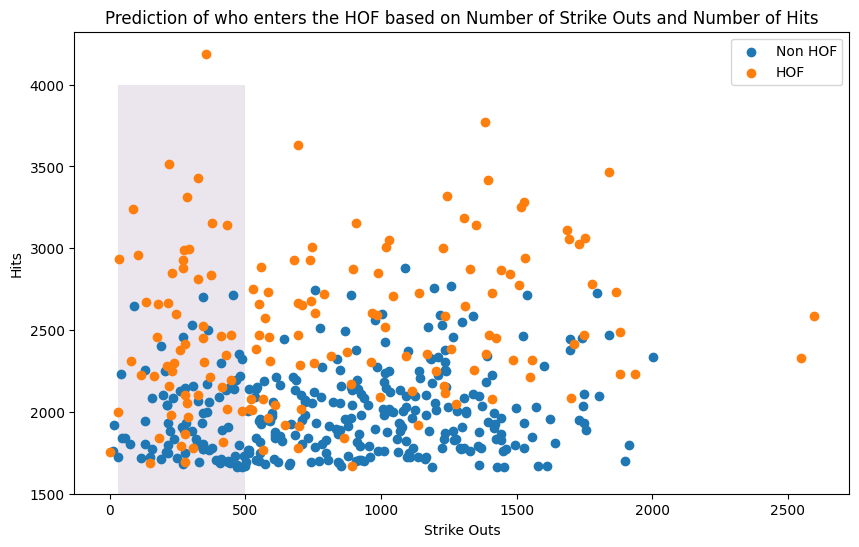

In [62]:
#KNN (Strikeouts and Hits)
features = df[['Hits', 'SO']]
label = df['HOF']
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test, predict))
#k=10 0.8279569892473119
#Visual model
fig, ax = plt.subplots(figsize=(10,6))
xx, yy = np.meshgrid(np.arange(30, 500), np.arange(1500, 4000))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
ax.pcolormesh(xx, yy, z, alpha=0.1)
for label, data in df.groupby("HOF"):
  ax.scatter(data['SO'], data['Hits'], label = ['Non HOF', 'HOF'][label])
ax.set_title("Prediction of who enters the HOF based on Number of Strike Outs and Number of Hits")
ax.set_xlabel("Strike Outs")
ax.set_ylabel("Hits")
ax.legend()
plt.show